<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468 entries, 0 to 3467
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3468 non-null   int64  
 1   tweet                3467 non-null   object 
 2   sarcastic            3468 non-null   int64  
 3   rephrase             867 non-null    object 
 4   sarcasm              867 non-null    float64
 5   irony                867 non-null    float64
 6   satire               867 non-null    float64
 7   understatement       867 non-null    float64
 8   overstatement        867 non-null    float64
 9   rhetorical_question  867 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 271.1+ KB


None

,Unnamed: 0,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",0.0,1.0,0.0,0.0,0.0,0.0
1,1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0
2,2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0
3,3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0
4,4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,1.0,0.0,0.0,0.0,0.0,0.0


,Unnamed: 0,sarcastic,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
count,3468.000000,3468.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000
mean,1733.500000,0.250000,0.822376,0.178777,0.028835,0.011534,0.046136,0.116494
std,1001.269694,0.433075,0.382417,0.383387,0.167439,0.106837,0.209901,0.321001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,866.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1733.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2600.250000,0.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3467.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


sarcastic
0    2601
1     867
Name: count, dtype: int64

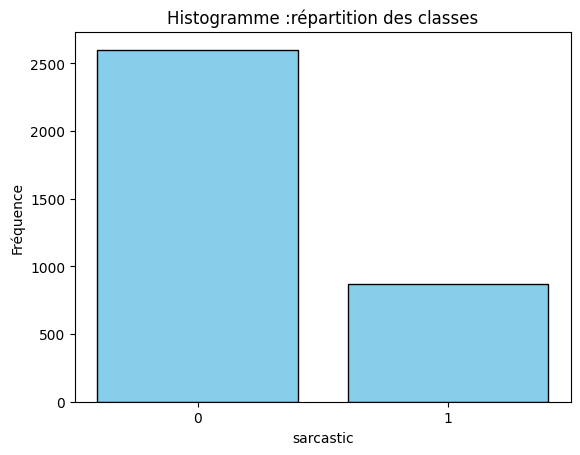

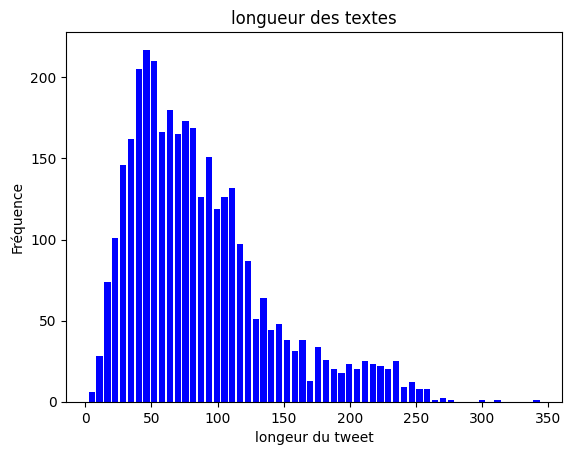

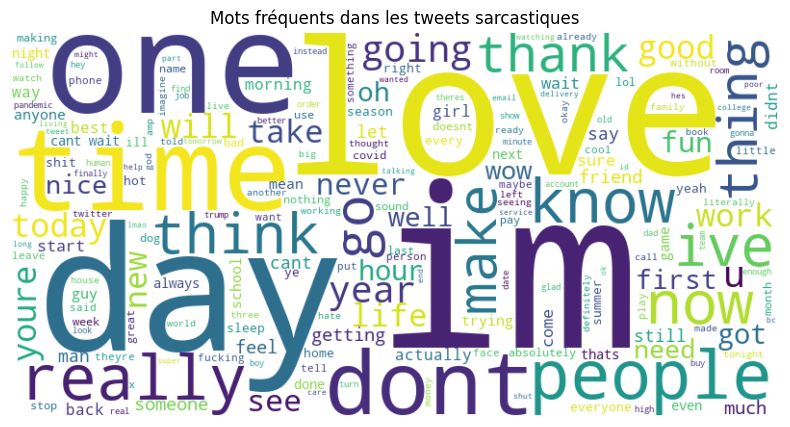

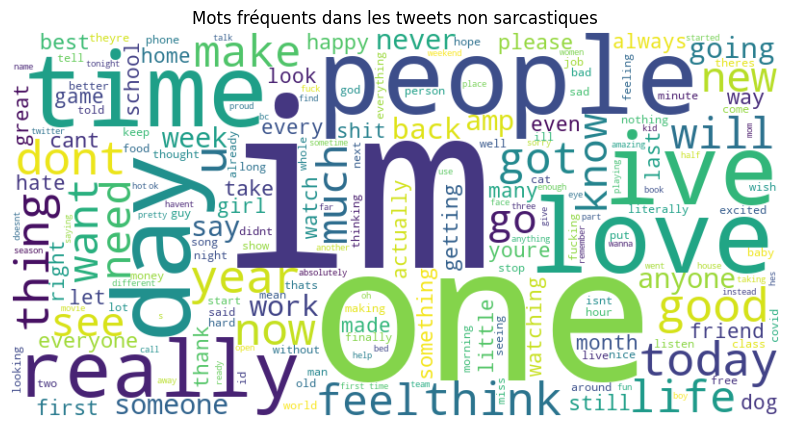

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from wordcloud import WordCloud


df = pd.read_csv("train.En.csv") #chargement du fichier : train.En.csv
#analys
display(df.info())
display(df.head())
display(df.describe())

#verification du distribution des classes
display(df["sarcastic"].value_counts())



#Mesure la longueur des textes 
df["num_words"] = df["tweet"].str.split().str.len()
df["len_tweet"] = df["tweet"].str.replace(" ","").str.len()

#visualisation des donnéés

plt.hist(df["sarcastic"], bins=[-0.5, 0.5, 1.5], color='skyblue', edgecolor='black', rwidth=0.8)
plt.xticks([0,1])  # pour afficher seulement 0 et 1 sur l'axe x
plt.title("Histogramme :répartition des classes")
plt.xlabel("sarcastic")
plt.ylabel("Fréquence")
plt.show()

plt.hist(df["len_tweet"], bins=int(np.sqrt(len(df["len_tweet"]))), color='blue', rwidth=0.8 )
plt.title("longueur des textes")
plt.xlabel("longeur du tweet")
plt.ylabel("Fréquence")
plt.show()




def clean_tweet(text):
    text = text.lower()                                  # mettre tout le texte en minuscules
    text = re.sub(r'http\S+|www\S+', '', text)           # supprimer les liens (URLs)
    text = re.sub(r'@\w+', '', text)                     # supprimer les mentions (@utilisateur)
    text = re.sub(r'#', '', text)                        # supprimer le symbole # mais garder le mot
    text = re.sub(r'[^a-z\s]', '', text)                 # supprimer la ponctuation, les chiffres et les emojis
    text = re.sub(r'\s+', ' ', text).strip()             # supprimer les espaces multiples et les espaces en trop
    return text


text_sarcastic = " ".join(df[df["sarcastic"] == 1]["tweet"].astype(str).tolist()) #mettre tout les tweets sarcastic dans la meme str
cleaned_tweet_sarcastic = clean_tweet(text_sarcastic)#nettoyage et transformation du text 

text_non_sarcastic = " ".join(df[df["sarcastic"] == 0]["tweet"].astype(str).tolist()) #mettre tout les tweets sarcastic dans la meme str
cleaned_tweet_non_sarcastic = clean_tweet(text_non_sarcastic)#nettoyage et transformation du text 

wordcloud_sarcastic = WordCloud(width=800, height=400, background_color='white').generate(cleaned_tweet_sarcastic)
wordcloud_non_sarcastic = WordCloud(width=800, height=400, background_color='white').generate(cleaned_tweet_non_sarcastic)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_sarcastic, interpolation='bilinear')
plt.axis('off')  
plt.title("Mots fréquents dans les tweets sarcastiques")

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_sarcastic, interpolation='bilinear')
plt.axis('off')  
plt.title("Mots fréquents dans les tweets non sarcastiques")

plt.show()



In [49]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perception_tagger_eng')
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def nltk_pos_to_wordnet(tag):
    if tag.startswith('J'):return wordnet.ADJ
    if tag.startswith('V'):return wordnet.VERB
    if tag.startswith('N'): return wordnet.NOUN
    if tag.startswith('R'):return wordnet.ADV
    return wordnet.NOUN
def preprocess_sarcasm_text(t):
    t = str(t).lower()
    t = re.sub(r'http\S+|www\S+', ' ', t)
    
    # ✅ Keep some punctuation (!!!, ???) - important for sarcasm!
    # Extract before removing
    has_multiple_exclaim = bool(re.search(r'!{2,}', t))
    has_multiple_question = bool(re.search(r'\?{2,}', t))
    
    t = emoji.demojize(t, delimiters=(" ", " "))
    t = re.sub(r'[^a-z\s]', ' ', t)
    t = re.sub(r'\s+', ' ', t).strip()
    
    tokens = word_tokenize(t)
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
    
    pos_tags = nltk.pos_tag(tokens)
    lemmas = [lemmatizer.lemmatize(token, nltk_pos_to_wordnet(pos)) 
              for token, pos in pos_tags]
    
    result = " ".join(lemmas)
    
    # Add back punctuation markers
    if has_multiple_exclaim:
        result += " MULTIEXCLAIM"
    if has_multiple_question:
        result += " MULTIQUESTION"
    
    return result
df['clean_text'] = df['tweet'].apply(preprocess_sarcasm_text)
df[['tweet','clean_text']].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\guesm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guesm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\guesm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading averged_perceptron_tagger: Package
[nltk_data]     'averged_perceptron_tagger' not found in index
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\guesm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Error loading averaged_perception_tagger_eng: Package
[nltk_data]     'averaged_perception_tagger_eng' not found in index


,tweet,clean_text
0,The only thing I got from college is a caffein...,thing get college caffeine addiction
1,I love it when professors draw a big question ...,love professor draw big question mark next ans...
2,Remember the hundred emails from companies whe...,remember hundred email company covid start get...
3,Today my pop-pop told me I was not “forced” to...,today pop pop tell force college upside face o...
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,volphancarol littlewhitty mysticalmanatee also...


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack,csr_matrix
from sklearn.model_selection import train_test_split



#Division des données en train/test (80% / 20%) 
X_train, X_test, y_train, y_test = train_test_split(df[["clean_text","num_words", "len_tweet"] ], df["sarcastic"], test_size=0.2, random_state=42,stratify=df["sarcastic"])



#vectorizer les textes netoyer avec TfidfVectorizer
tf_id = TfidfVectorizer(max_features=5000, ngram_range=(1,3), min_df=2, max_df=0.9, sublinear_tf=True)
vecorized_text = tf_id.fit_transform(X_train["clean_text"])
#concatiner les features numerique
numeric_features = X_train[["num_words", "len_tweet"]].fillna(0).values
X_train_vec = hstack([vecorized_text, csr_matrix(numeric_features)] )

vec = tf_id.transform(X_test["clean_text"])
n = X_test[["num_words", "len_tweet"]].fillna(0).values
X_test_vec = hstack([vec, csr_matrix(n)] )



In [51]:

from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV


def training(X_train, X_test, y_train, y_test, model ) :
   
    model.fit(X_train,y_train)

    y_predict = model.predict(X_test) #donner les prediction du model de x_test
    cm = confusion_matrix(y_test, y_predict)#matrice de confusion
    ConfusionMatrixDisplay(cm, display_labels=['non sarcastic','sarcastic ']).plot()
    plt.title("Matrice de confusion  ")
    plt.show()
    #calcul des metrics
    accuracy = accuracy_score(y_test, y_predict) #accuracy
    f1 = f1_score(y_test, y_predict) #f1 score
    precision = precision_score(y_test, y_predict ) #precision
    recall = recall_score(y_test, y_predict) #recall
    auc = roc_auc_score(y_test, y_predict)

    print(
        f"accuracy = {accuracy} \n" +
        f"f1 = {f1} \n" +
        f"precision = {precision} \n" + 
        f"recall = {recall} \n"+
        f"auc = {auc}"
    )

    return {"accuracy" : accuracy, "f1" : f1, "precision" : precision, "recall" : recall, "auc" : auc}

In [52]:
from imblearn.over_sampling import RandomOverSampler
rg = RandomOverSampler(sampling_strategy="not majority")
X_res_train, y_res_train = rg.fit_resample(X_train_vec, y_train)


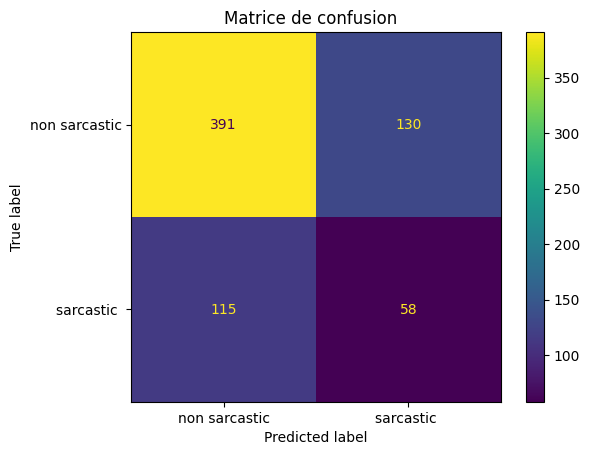

accuracy = 0.6469740634005764 
f1 = 0.32132963988919666 
precision = 0.30851063829787234 
recall = 0.3352601156069364 
auc = 0.5428699810280363


In [53]:
log = LogisticRegression(max_iter=2000)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'class_weight': ['balanced']
}

grid = GridSearchCV(
    log,
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid.fit(X_res_train, y_res_train)

eval_l = training(X_res_train,  X_test_vec, y_res_train, y_test, grid.best_estimator_ )
